##### 21BDS0340 - Abhinav Dinesh Srivatsa

In [21]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
data = pd.read_csv("drug_data.csv")
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [23]:
test = {
    "Age": "31.0 < x <= 45.0",
    "Sex": "M",
    "BP": "LOW",
    "Cholesterol": "HIGH",
    "Na_to_K": "13.9365 < x <= 19.38"
}
test

{'Age': '31.0 < x <= 45.0',
 'Sex': 'M',
 'BP': 'LOW',
 'Cholesterol': 'HIGH',
 'Na_to_K': '13.9365 < x <= 19.38'}

In [24]:
def numeric_to_categorical(numeric_data):
    """
    Method to convert a numerical Series to a categorical ranged list. Ranges are decided by the quartiles Q1, Q2, Q3
    """
    quartiles = numeric_data.quantile([0.25, 0.5, 0.75])
    q1, q2, q3 = quartiles[0.25], quartiles[0.5], quartiles[0.75]

    new_numeric_data = []
    for row in numeric_data:
        if row <= q1:
            new_numeric_data.append(f"x <= {q1}")
        elif row <= q2:
            new_numeric_data.append(f"{q1} < x <= {q2}")
        elif row <= q3:
            new_numeric_data.append(f"{q2} < x <= {q3}")
        else:
            new_numeric_data.append(f"{q3} < x")
    
    return new_numeric_data

In [25]:
# converting the numerical columns to categorical
data["Age"] = numeric_to_categorical(data["Age"])
data["Na_to_K"] = numeric_to_categorical(data["Na_to_K"])
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,x <= 31.0,F,HIGH,HIGH,19.38 < x,drugY
1,45.0 < x <= 58.0,M,LOW,HIGH,10.4455 < x <= 13.9365,drugC
2,45.0 < x <= 58.0,M,LOW,HIGH,x <= 10.4455,drugC
3,x <= 31.0,F,NORMAL,HIGH,x <= 10.4455,drugX
4,58.0 < x,F,LOW,HIGH,13.9365 < x <= 19.38,drugY
...,...,...,...,...,...,...
195,45.0 < x <= 58.0,F,LOW,HIGH,10.4455 < x <= 13.9365,drugC
196,x <= 31.0,M,LOW,HIGH,10.4455 < x <= 13.9365,drugC
197,45.0 < x <= 58.0,M,NORMAL,HIGH,x <= 10.4455,drugX
198,x <= 31.0,M,NORMAL,NORMAL,13.9365 < x <= 19.38,drugX


In [26]:
les = {column: LabelEncoder().fit(data[column]) for column in data.columns}
les

{'Age': LabelEncoder(),
 'Sex': LabelEncoder(),
 'BP': LabelEncoder(),
 'Cholesterol': LabelEncoder(),
 'Na_to_K': LabelEncoder(),
 'Drug': LabelEncoder()}

In [27]:
data_transformed = pd.DataFrame()
for column, enc in les.items():
    data_transformed[column] = enc.transform(data[column])
data_transformed

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,3,0,0,0,2,4
1,1,1,1,0,0,2
2,1,1,1,0,3,2
3,3,0,2,0,3,3
4,2,0,1,0,1,4
...,...,...,...,...,...,...
195,1,0,1,0,0,2
196,3,1,1,0,0,2
197,1,1,2,0,3,3
198,3,1,2,1,1,3


In [28]:
test_transformed = pd.DataFrame()
for column, enc in les.items():
    if column == "Drug":
        continue
    test_transformed[column] = enc.transform([test[column]])
test_transformed

,Age,Sex,BP,Cholesterol,Na_to_K
0,0,1,1,0,1


In [29]:
X = data_transformed.drop("Drug", axis=1)
y = data_transformed["Drug"]
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,3,0,0,0,2
1,1,1,1,0,0
2,1,1,1,0,3
3,3,0,2,0,3
4,2,0,1,0,1
...,...,...,...,...,...
195,1,0,1,0,0
196,3,1,1,0,0
197,1,1,2,0,3
198,3,1,2,1,1


In [30]:
drug_classes = len(les["Drug"].classes_)
drug_classes

5

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train

,Age,Sex,BP,Cholesterol,Na_to_K
124,1,0,0,1,0
16,2,1,1,1,0
148,2,0,1,1,3
93,0,0,1,1,2
65,2,0,2,1,2
...,...,...,...,...,...
106,3,1,2,0,0
14,1,0,2,0,0
92,3,0,0,0,2
179,2,0,2,0,1


In [32]:
def confusion_matrix(y_pred, y_test, classes):
    matrix = np.zeros((classes, classes))
    for i in range(len(y_pred)):
        pred = y_pred[i]
        real = y_test[i]
        matrix[pred][real] += 1
    sns.heatmap(matrix, cmap="mako", annot=True)

In [33]:
# training decision tree classifier
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)

plt.figure(figsize=(10, 7))
plot_tree(dtc)

[Text(0.5732758620689655, 0.9545454545454546, 'X[4] <= 2.5\ngini = 0.687\nsamples = 180\nvalue = [20, 14, 14, 48, 84]'),
 Text(0.27298850574712646, 0.8636363636363636, 'X[4] <= 0.5\ngini = 0.573\nsamples = 136\nvalue = [11, 9, 8, 24, 84]'),
 Text(0.11494252873563218, 0.7727272727272727, 'X[2] <= 0.5\ngini = 0.698\nsamples = 43\nvalue = [10, 7, 7, 19, 0]'),
 Text(0.04597701149425287, 0.6818181818181818, 'X[0] <= 0.5\ngini = 0.484\nsamples = 17\nvalue = [10, 7, 0, 0, 0]'),
 Text(0.022988505747126436, 0.5909090909090909, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0, 0, 0]'),
 Text(0.06896551724137931, 0.5909090909090909, 'X[0] <= 2.5\ngini = 0.486\nsamples = 12\nvalue = [5, 7, 0, 0, 0]'),
 Text(0.04597701149425287, 0.5, 'X[3] <= 0.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7, 0, 0, 0]'),
 Text(0.022988505747126436, 0.4090909090909091, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0, 0, 0]'),
 Text(0.06896551724137931, 0.4090909090909091, 'X[1] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2, 0, 

Score: 0.95


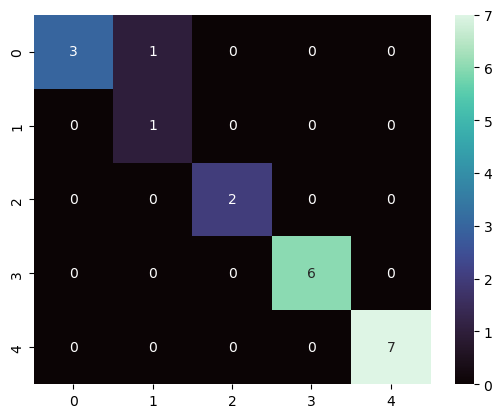

In [ ]:
# checking decision tree accuracy
predicted_test = dtc.predict(X_test)
print(f"Score: {dtc.score(X_test, y_test)}")
confusion_matrix(predicted_test, y_test.values, drug_classes)

In [ ]:
# prediction of non labelled data
predicted_enc = dtc.predict(test_transformed)
predicted = les["Drug"].inverse_transform(predicted_enc)[0]
predicted

'drugY'

In [ ]:
# training naive bayes classifier
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)

Score: 0.75


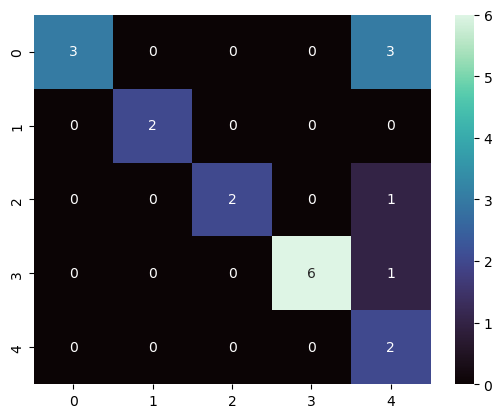

In [ ]:
# checking naive bayes classifier accuracy
predicted_test = gnb.predict(X_test)
print(f"Score: {gnb.score(X_test, y_test)}")
confusion_matrix(predicted_test, y_test.values, drug_classes)

In [ ]:
print(f"Score of Decision Tree: {dtc.score(X_test, y_test)}")
print(f"Score of Gaussian Naive Bayes: {gnb.score(X_test, y_test)}")

Score of Decision Tree: 0.95
Score of Gaussian Naive Bayes: 0.75
